In [2]:
import numpy as np
import pandas as pd
import chardet

with open('./spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
df = pd.read_csv('./spam.csv', encoding=encoding)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5067,ham,Talk to g and x about that,NaN,NaN,NaN
2602,ham,So when you gonna get rimac access,NaN,NaN,NaN
5306,ham,Ill be at yours in about 3 mins but look out f...,NaN,NaN,NaN
3035,ham,;-) ok. I feel like john lennon.,NaN,NaN,NaN
531,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2709,ham,Sorry de i went to shop.
4905,ham,Will you come online today night
3951,ham,Me hungry buy some food good lei... But mum n ...
1787,ham,Yes:)sura in sun tv.:)lol.
1858,ham,"Sir, i am waiting for your call."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

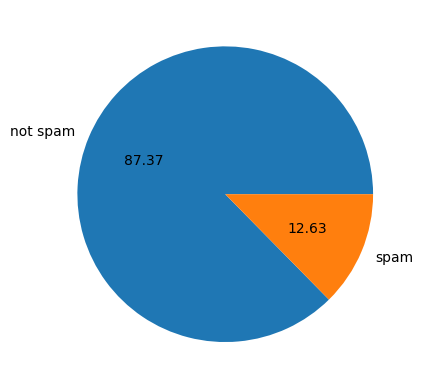

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
pip install gensim

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
from gensim.utils import tokenize
df['num_words'] = df['text'].apply(lambda x:len(list(tokenize(x))))

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.529116,1.965564
std,58.236293,11.169776,1.448541
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,190.000000,38.000000


In [34]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.423162,1.820195
std,56.358207,11.315082,1.383657
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,38.000000


In [35]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.177642,2.970904
std,30.137753,5.938772,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,21.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,27.000000,4.000000
max,224.000000,36.000000,9.000000


In [36]:
def transform_text(text):
    text = text.lower()
    text = list(tokenize(text))

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gonna home soon want talk stuff anymor tonight k cri enough today'

In [38]:
ps.stem('loving')

'love'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [41]:
pip install wordcloud

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

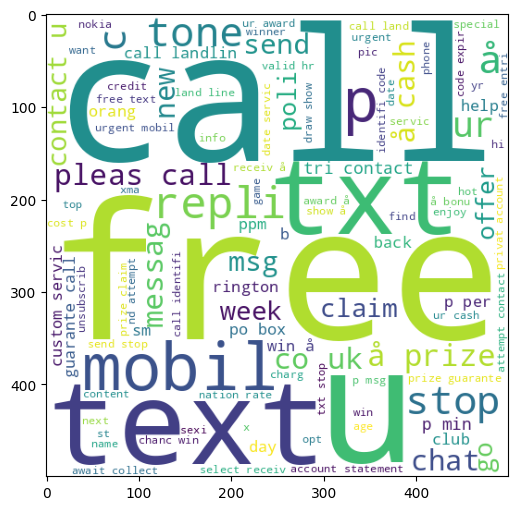

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

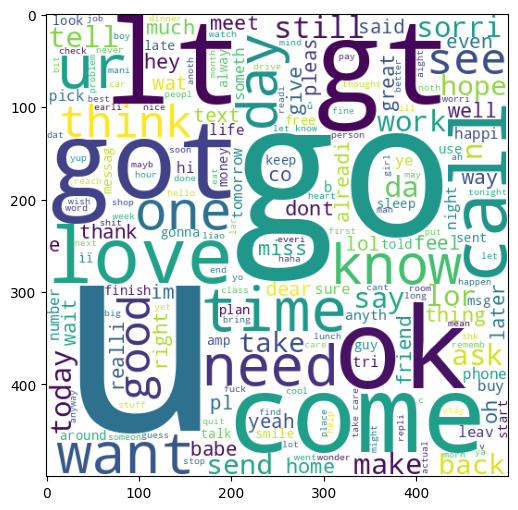

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [65]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
knc = KNeighborsClassifier()

In [69]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print('accuracy',accuracy)
print('precision',precision)

accuracy 0.9090909090909091
precision 1.0


In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



In [70]:
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print('accuracy',accuracy)
print('precision',precision)

accuracy 0.9555125725338491
precision 0.9509803921568627


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.839622641509434
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9509803921568627
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571
For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9658119658119658
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.837037037037037
For  ETC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9247311827956989
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.973888,1.000000
5,RF,0.970986,0.982143
8,ETC,0.976789,0.975000
0,SVC,0.976789,0.967213
6,AdaBoost,0.971954,0.965812
4,LR,0.955513,0.950980
10,xgb,0.972921,0.943548
9,GBDT,0.942940,0.924731
3,DT,0.936170,0.839623


In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('logistic_model.pkl','wb'))